In [229]:
Data = "/home/doug/Desktop/Projecrs/Stock-Prediction/Data_for_Analysis/PLTR.csv"

In [230]:
import pandas as pd

In [231]:
df= pd.read_csv(Data)


In [232]:
df.head(100)

,Date,Open,High,Low,Close,Volume
0,2020-09-30,10.00,11.42,9.110,9.50,338584433
1,2020-10-01,9.69,10.10,9.230,9.46,124297587
2,2020-10-02,9.06,9.28,8.940,9.20,55018343
3,2020-10-05,9.43,9.49,8.920,9.03,36316878
4,2020-10-06,9.04,10.18,8.900,9.90,90864039
...,...,...,...,...,...,...
95,2021-02-17,27.99,29.73,27.000,27.08,151007022
96,2021-02-18,24.99,26.31,24.500,25.17,313175121
97,2021-02-19,27.02,29.96,26.900,29.00,320063732
98,2021-02-22,29.96,30.19,27.536,28.00,183049487


<Axes: title={'center': 'PLTR Open and Close Prices Over Time'}, xlabel='Date'>

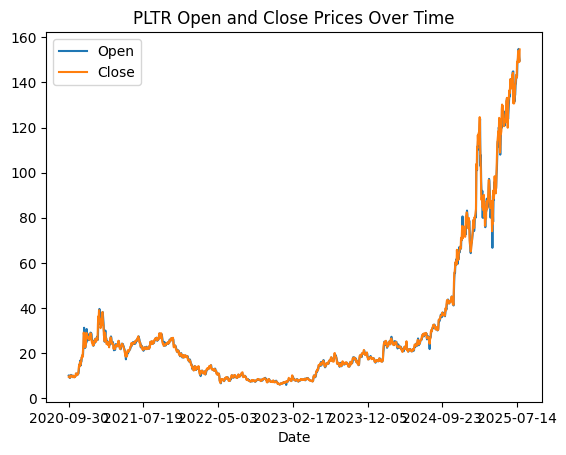

In [233]:
df.plot(x="Date", y=["Open", "Close"], kind="line", title="PLTR Open and Close Prices Over Time")

In [234]:
df=df[['Date','Open','Close']]


In [235]:
df['Date']

0       2020-09-30
1       2020-10-01
2       2020-10-02
3       2020-10-05
4       2020-10-06
           ...    
1203    2025-07-17
1204    2025-07-18
1205    2025-07-21
1206    2025-07-22
1207    2025-07-23
Name: Date, Length: 1208, dtype: object

In [236]:
##Converting date column to datetime format for feasible operations.

import datetime
df['Date'] = pd.to_datetime(df['Date']) 


/tmp/ipykernel_2959074/1543661816.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [237]:
df['Date']

0      2020-09-30
1      2020-10-01
2      2020-10-02
3      2020-10-05
4      2020-10-06
          ...    
1203   2025-07-17
1204   2025-07-18
1205   2025-07-21
1206   2025-07-22
1207   2025-07-23
Name: Date, Length: 1208, dtype: datetime64[ns]

In [238]:
#converting datecolumn to index. (removing the index column to make date as index)

df.index= df.pop('Date')
df 

,Open,Close
Date,,
2020-09-30,10.00,9.50
2020-10-01,9.69,9.46
2020-10-02,9.06,9.20
2020-10-05,9.43,9.03
2020-10-06,9.04,9.90
...,...,...
2025-07-17,151.56,153.99
2025-07-18,154.86,153.52
2025-07-21,153.88,151.79


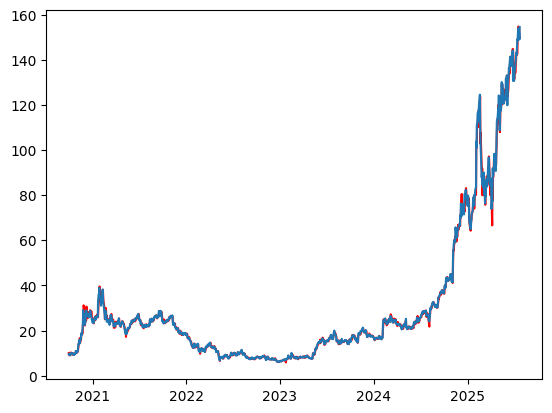

In [239]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Open'], label='Opening Price', color='Red')
plt.plot(df.index, df['Close'], label='Closing Price')

In [240]:
df

,Open,Close
Date,,
2020-09-30,10.00,9.50
2020-10-01,9.69,9.46
2020-10-02,9.06,9.20
2020-10-05,9.43,9.03
2020-10-06,9.04,9.90
...,...,...
2025-07-17,151.56,153.99
2025-07-18,154.86,153.52
2025-07-21,153.88,151.79


In [241]:
import numpy as np


In [242]:
def df_to_windowed_df(dataframe, firstdatestr, lastdatestr, n=3):
    first_date = pd.to_datetime(firstdatestr)
    last_date = pd.to_datetime(lastdatestr)
    dates, X, Y = [], [], []

    # Ensure index is datetime and sorted
    dataframe = dataframe.sort_index()
    if not isinstance(dataframe.index, pd.DatetimeIndex):
        dataframe.index = pd.to_datetime(dataframe.index)

    # Get all dates in range
    all_dates = dataframe.loc[first_date:last_date].index

    for target_date in all_dates:
        df_subset = dataframe.loc[:target_date].tail(n+1)
        if len(df_subset) != n+1:
            continue  # skip if not enough data
        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]
        dates.append(target_date)
        X.append(x)
        Y.append(y)

    ret_df = pd.DataFrame({'Date': dates})
    X = np.array(X)
    for i in range(n):
        ret_df[f'Target-{n-i}'] = X[:, i]
    ret_df['Target'] = Y
    return ret_df

windowed_df = df_to_windowed_df(df, '2020-10-05', '2025-07-18', n=3)
windowed_df

,Date,Target-3,Target-2,Target-1,Target
0,2020-10-05,9.50,9.46,9.20,9.03
1,2020-10-06,9.46,9.20,9.03,9.90
2,2020-10-07,9.20,9.03,9.90,10.00
3,2020-10-08,9.03,9.90,10.00,10.00
4,2020-10-09,9.90,10.00,10.00,9.95
...,...,...,...,...,...
1197,2025-07-14,143.13,142.50,142.10,149.15
1198,2025-07-15,142.50,142.10,149.15,148.58
1199,2025-07-16,142.10,149.15,148.58,150.91
1200,2025-07-17,149.15,148.58,150.91,153.99


In [243]:
df2= pd.read_csv(Data)
df2=df2[['Date','High','Low','Open','Close']]
df2['Date']=pd.to_datetime(df2['Date'])
df2.index= df2.pop('Date')
df2





,High,Low,Open,Close
Date,,,,
2020-09-30,11.4200,9.1100,10.00,9.50
2020-10-01,10.1000,9.2300,9.69,9.46
2020-10-02,9.2800,8.9400,9.06,9.20
2020-10-05,9.4900,8.9200,9.43,9.03
2020-10-06,10.1800,8.9000,9.04,9.90
...,...,...,...,...
2025-07-17,155.6800,150.8200,151.56,153.99
2025-07-18,154.9200,151.9000,154.86,153.52
2025-07-21,155.4400,151.3600,153.88,151.79


<BarContainer object of 1208 artists>

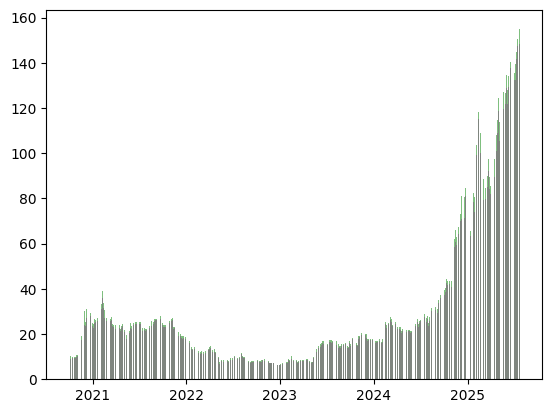

In [244]:
#plt.plot(df2.index, df2['Open'], label='Opening Price', color='Red')
plt.bar(df2.index, df2['High'], label='Highest Price', color='Green', alpha=0.5)
#plt.plot(df2.index, df2['Close'], label='Closing Price', color='Blue', marker='.')
plt.bar(df2.index, df2['Low'], label='Lowest Price', color='Purple',alpha=0.3)

In [245]:
import numpy as np
import pandas as pd


def df_to_windowed_df_multi(dataframe, firstdatestr, lastdatestr, n=3):
    first_date = pd.to_datetime(firstdatestr)
    last_date = pd.to_datetime(lastdatestr)
    dates, X, Y = [], [], []

    dataframe = dataframe.sort_index()
    if not isinstance(dataframe.index, pd.DatetimeIndex):
        dataframe.index = pd.to_datetime(dataframe.index)

    features = ['Open', 'High', 'Low', 'Close']
    all_dates = dataframe.loc[first_date:last_date].index

    for target_date in all_dates:
        df_subset = dataframe.loc[:target_date].tail(n+1)
        if len(df_subset) != n+1:
            continue
        # Previous n days' features, flattened
        x = df_subset[features].iloc[:-1].to_numpy().flatten()
        # Present day's targets
        y = df_subset[features].iloc[-1].to_numpy()
        dates.append(target_date)
        X.append(x)
        Y.append(y)
    

    X = np.array(X)
    print(X[:10])
    Y = np.array(Y)
    print(Y[:10])
    ret_df = pd.DataFrame({'Date': dates})
    # Add feature columns
    for i in range(n):
        for j, feat in enumerate(features):
            ret_df[f'{feat}-{n-i}'] = X[:, i*len(features)+j]
            #print(i,j,feat,ret_df)
    # Add target columns
    for j, feat in enumerate(features):
        ret_df[f'Target_{feat}'] = Y[:, j]
        ret_df
    return ret_df

# Usage:

windowed_df_multi = df_to_windowed_df_multi(df2, '2020-09-30', '2025-07-23', n=3)
windowed_df_multi

[[10.   11.42  9.11  9.5   9.69 10.1   9.23  9.46  9.06  9.28  8.94  9.2 ]
 [ 9.69 10.1   9.23  9.46  9.06  9.28  8.94  9.2   9.43  9.49  8.92  9.03]
 [ 9.06  9.28  8.94  9.2   9.43  9.49  8.92  9.03  9.04 10.18  8.9   9.9 ]
 [ 9.43  9.49  8.92  9.03  9.04 10.18  8.9   9.9  10.04 10.49  9.99 10.  ]
 [ 9.04 10.18  8.9   9.9  10.04 10.49  9.99 10.   10.29 10.4   9.99 10.  ]
 [10.04 10.49  9.99 10.   10.29 10.4   9.99 10.   10.13 10.19  9.89  9.95]
 [10.29 10.4   9.99 10.   10.13 10.19  9.89  9.95 10.04 10.05  9.66  9.89]
 [10.13 10.19  9.89  9.95 10.04 10.05  9.66  9.89  9.88  9.88  9.41  9.47]
 [10.04 10.05  9.66  9.89  9.88  9.88  9.41  9.47  9.6   9.66  9.29  9.34]
 [ 9.88  9.88  9.41  9.47  9.6   9.66  9.29  9.34  9.27  9.91  9.18  9.91]]
[[ 9.43  9.49  8.92  9.03]
 [ 9.04 10.18  8.9   9.9 ]
 [10.04 10.49  9.99 10.  ]
 [10.29 10.4   9.99 10.  ]
 [10.13 10.19  9.89  9.95]
 [10.04 10.05  9.66  9.89]
 [ 9.88  9.88  9.41  9.47]
 [ 9.6   9.66  9.29  9.34]
 [ 9.27  9.91  9.18  9.91]
 [ 9.9

,Date,Open-3,High-3,Low-3,Close-3,Open-2,High-2,Low-2,Close-2,Open-1,High-1,Low-1,Close-1,Target_Open,Target_High,Target_Low,Target_Close
0,2020-10-05,10.00,11.420,9.1100,9.50,9.69,10.10,9.2300,9.46,9.06,9.2800,8.9400,9.20,9.43,9.4900,8.9200,9.03
1,2020-10-06,9.69,10.100,9.2300,9.46,9.06,9.28,8.9400,9.20,9.43,9.4900,8.9200,9.03,9.04,10.1800,8.9000,9.90
2,2020-10-07,9.06,9.280,8.9400,9.20,9.43,9.49,8.9200,9.03,9.04,10.1800,8.9000,9.90,10.04,10.4900,9.9900,10.00
3,2020-10-08,9.43,9.490,8.9200,9.03,9.04,10.18,8.9000,9.90,10.04,10.4900,9.9900,10.00,10.29,10.4000,9.9900,10.00
4,2020-10-09,9.04,10.180,8.9000,9.90,10.04,10.49,9.9900,10.00,10.29,10.4000,9.9900,10.00,10.13,10.1900,9.8900,9.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2025-07-17,142.72,149.575,142.2200,149.15,148.93,150.62,147.3601,148.58,149.30,151.5100,147.6744,150.91,151.56,155.6800,150.8200,153.99
1201,2025-07-18,148.93,150.620,147.3601,148.58,149.30,151.51,147.6744,150.91,151.56,155.6800,150.8200,153.99,154.86,154.9200,151.9000,153.52
1202,2025-07-21,149.30,151.510,147.6744,150.91,151.56,155.68,150.8200,153.99,154.86,154.9200,151.9000,153.52,153.88,155.4400,151.3600,151.79
1203,2025-07-22,151.56,155.680,150.8200,153.99,154.86,154.92,151.9000,153.52,153.88,155.4400,151.3600,151.79,150.85,151.7899,145.0620,149.07


In [246]:
df3=df2.iloc[:10]
df3


,High,Low,Open,Close
Date,,,,
2020-09-30,11.42,9.11,10.00,9.50
2020-10-01,10.10,9.23,9.69,9.46
2020-10-02,9.28,8.94,9.06,9.20
2020-10-05,9.49,8.92,9.43,9.03
2020-10-06,10.18,8.90,9.04,9.90
2020-10-07,10.49,9.99,10.04,10.00
2020-10-08,10.40,9.99,10.29,10.00
2020-10-09,10.19,9.89,10.13,9.95
2020-10-12,10.05,9.66,10.04,9.89


[[10.   11.42  9.11  9.5   9.69 10.1   9.23  9.46  9.06  9.28  8.94  9.2 ]
 [ 9.69 10.1   9.23  9.46  9.06  9.28  8.94  9.2   9.43  9.49  8.92  9.03]
 [ 9.06  9.28  8.94  9.2   9.43  9.49  8.92  9.03  9.04 10.18  8.9   9.9 ]
 [ 9.43  9.49  8.92  9.03  9.04 10.18  8.9   9.9  10.04 10.49  9.99 10.  ]
 [ 9.04 10.18  8.9   9.9  10.04 10.49  9.99 10.   10.29 10.4   9.99 10.  ]
 [10.04 10.49  9.99 10.   10.29 10.4   9.99 10.   10.13 10.19  9.89  9.95]
 [10.29 10.4   9.99 10.   10.13 10.19  9.89  9.95 10.04 10.05  9.66  9.89]]
[[ 9.43  9.49  8.92  9.03]
 [ 9.04 10.18  8.9   9.9 ]
 [10.04 10.49  9.99 10.  ]
 [10.29 10.4   9.99 10.  ]
 [10.13 10.19  9.89  9.95]
 [10.04 10.05  9.66  9.89]
 [ 9.88  9.88  9.41  9.47]]


<BarContainer object of 7 artists>

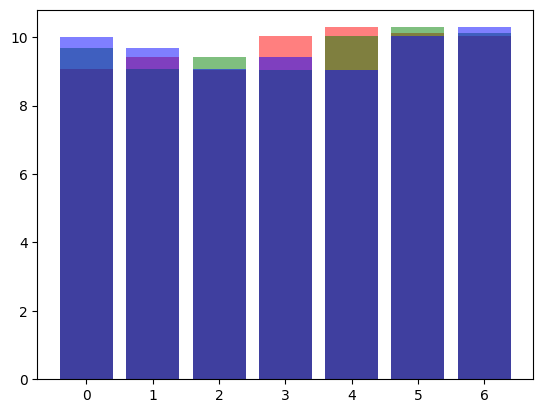

In [247]:
from matplotlib import pyplot as plt


new_check = df_to_windowed_df_multi(df3, '2020-09-30', '2021-02-23', 3)
new_check
plt.bar(new_check.index, new_check['Open-1'], label='Opening Price', color='Red', alpha=0.5)
plt.bar(new_check.index, new_check['Open-2'], label='Opening Price', color='Green', alpha=0.5)
plt.bar(new_check.index, new_check['Open-3'], label='Opening Price', color='Blue', alpha=0.5)

In [248]:
def df_to_windowed_DL(dataframe, firstdatestr, lastdatestr, n=3):
    import pandas as pd
    import numpy as np

    first_date = pd.to_datetime(firstdatestr)
    last_date = pd.to_datetime(lastdatestr)
    dates, X, Y = [], [], []

    dataframe = dataframe.sort_index()
    if not isinstance(dataframe.index, pd.DatetimeIndex):
        dataframe.index = pd.to_datetime(dataframe.index)

    features = ['Open', 'High', 'Low', 'Close']
    all_dates = dataframe.loc[first_date:last_date].index

    for target_date in all_dates:
        df_subset = dataframe.loc[:target_date].tail(n+1)

        if len(df_subset) != n + 1:
            continue

    # DEBUG:
        if not all(f in df_subset.columns for f in features):
            print(f"[!] Missing columns at {target_date}: {df_subset.columns.tolist()}")
            continue

        x = df_subset[features].iloc[:-1].to_numpy()
        y= df_subset[features].iloc[-1].to_numpy()

        dates.append(target_date)
        X.append(x)
        Y.append(y)

    # Now convert to DataFrame
    X = np.array(X)  # shape: (num_samples, n, 4)
    Y = np.array(Y)  # shape: (num_samples, 4)

    ret_df = pd.DataFrame({'Date': dates})

    # For each time step and each feature, add separate column
    for time_step in range(n):
        for feat_idx, feat_name in enumerate(features):
            ret_df[f'Target-{feat_name}-{n - time_step}'] = X[:, time_step, feat_idx]

    # Add target values for each feature (i.e. value at day t)
    for feat_idx, feat_name in enumerate(features):
        ret_df[f'Target_{feat_name}'] = Y[:, feat_idx]

    return ret_df


DL_DF=df_to_windowed_DL(df2, '2020-09-30', '2025-07-23', 2)
DL_DF


,Date,Target-Open-2,Target-High-2,Target-Low-2,Target-Close-2,Target-Open-1,Target-High-1,Target-Low-1,Target-Close-1,Target_Open,Target_High,Target_Low,Target_Close
0,2020-10-02,10.00,11.42,9.1100,9.50,9.69,10.1000,9.2300,9.46,9.06,9.2800,8.9400,9.20
1,2020-10-05,9.69,10.10,9.2300,9.46,9.06,9.2800,8.9400,9.20,9.43,9.4900,8.9200,9.03
2,2020-10-06,9.06,9.28,8.9400,9.20,9.43,9.4900,8.9200,9.03,9.04,10.1800,8.9000,9.90
3,2020-10-07,9.43,9.49,8.9200,9.03,9.04,10.1800,8.9000,9.90,10.04,10.4900,9.9900,10.00
4,2020-10-08,9.04,10.18,8.9000,9.90,10.04,10.4900,9.9900,10.00,10.29,10.4000,9.9900,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,2025-07-17,148.93,150.62,147.3601,148.58,149.30,151.5100,147.6744,150.91,151.56,155.6800,150.8200,153.99
1202,2025-07-18,149.30,151.51,147.6744,150.91,151.56,155.6800,150.8200,153.99,154.86,154.9200,151.9000,153.52
1203,2025-07-21,151.56,155.68,150.8200,153.99,154.86,154.9200,151.9000,153.52,153.88,155.4400,151.3600,151.79
1204,2025-07-22,154.86,154.92,151.9000,153.52,153.88,155.4400,151.3600,151.79,150.85,151.7899,145.0620,149.07


In [249]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Define features and targets
features = ['Open', 'High', 'Low', 'Close']
n = 2  # time steps

# Extract and reshape X
X = DL_DF[[f'Target-{f}-{i+1}' for i in reversed(range(n)) for f in features]].values
X = X.reshape(-1, n, len(features))  # (samples, timesteps, features)

# Extract Y
Y = DL_DF[[f'Target_{f}' for f in features]].values  # (samples, features)

# Normalize data
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X.reshape(-1, len(features))).reshape(-1, n, len(features))
Y = y_scaler.fit_transform(Y)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)


In [250]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(64, input_shape=(n, len(features)), return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(4)  # 4 target outputs: Open, High, Low, Close
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()



/home/doug/Desktop/Projecrs/Stock-Prediction/venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,876 (77.64 KB)

 Trainable params: 19,876 (77.64 KB)

 Non-trainable params: 0 (0.00 B)

In [261]:
history = model.fit(
    X_train, Y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.2598e-05 - mae: 0.0050 - val_loss: 3.1287e-05 - val_mae: 0.0044
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.2780e-05 - mae: 0.0045 - val_loss: 2.5326e-05 - val_mae: 0.0039
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.2464e-05 - mae: 0.0043 - val_loss: 2.7034e-05 - val_mae: 0.0040
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.8486e-05 - mae: 0.0047 - val_loss: 3.5942e-05 - val_mae: 0.0048
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.4220e-05 - mae: 0.0045 - val_loss: 2.5125e-05 - val_mae: 0.0039
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9602e-05 - mae: 0.0043 - val_loss: 2.9280e-05 - val_mae: 0.0042
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1161e-05 - mae: 0.0043 - val_loss: 2.4983e-05 - val_mae: 0.0039
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.1305e-05 - mae: 0.0044 - val_loss: 2.4688e-05 - val_mae: 0.0038
Epoch 9/

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


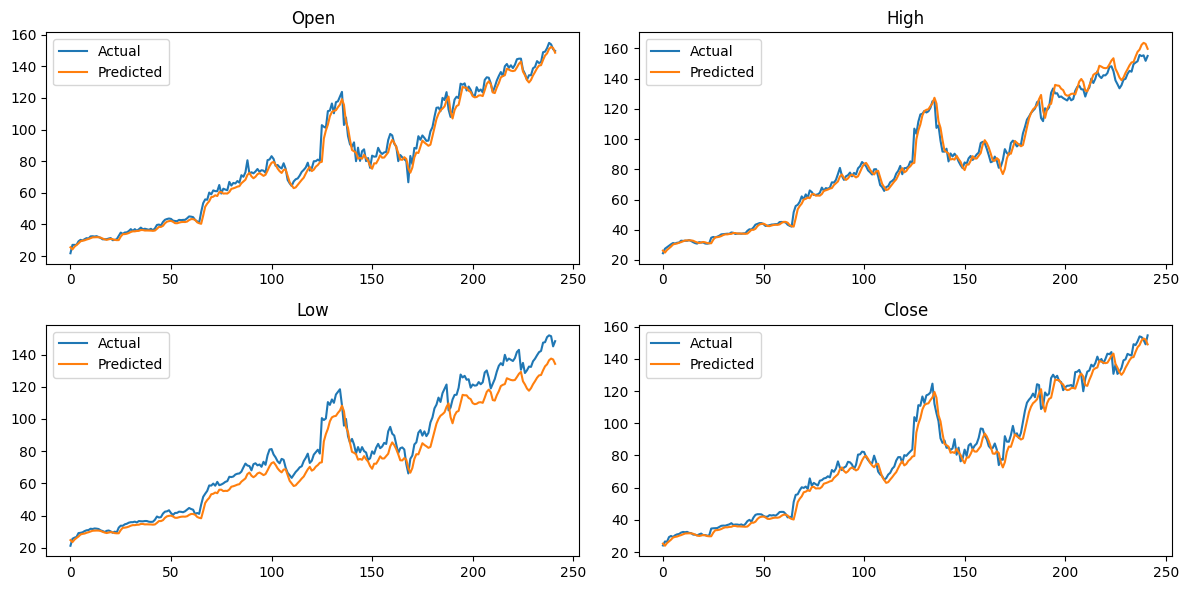

In [252]:
import matplotlib.pyplot as plt

# Predict on test set
Y_pred_scaled = model.predict(X_test)
Y_pred = y_scaler.inverse_transform(Y_pred_scaled)
Y_true = y_scaler.inverse_transform(Y_test)

# Plot Open/High/Low/Close for a few samples
plt.figure(figsize=(12, 6))
for i, label in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i+1)
    plt.plot(Y_true[:, i], label='Actual')
    plt.plot(Y_pred[:, i], label='Predicted')
    plt.title(label)
    plt.legend()
plt.tight_layout()
plt.show()


In [253]:
loss, mae = model.evaluate(X_test, Y_test)
print(f"Test MSE: {loss:.4f}, MAE: {mae:.4f}")

# Predict one sample
pred = model.predict(X_test[:1])
print("Predicted (scaled):", pred)
print("Actual (scaled):", Y_test[:1])


1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.3880e-05 - mae: 0.0074

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.1609e-04 - mae: 0.0203 
Test MSE: 0.0015, MAE: 0.0285
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted (scaled): [[0.13190603 0.13403298 0.1294413  0.12939702]]
Actual (scaled): [[0.10669709 0.12206541 0.10536766 0.12171163]]


In [254]:
# Grab last 2 days for prediction
latest_X = DL_DF.iloc[-1][[f'Target-{f}-{i+1}' for i in reversed(range(n)) for f in features]]
latest_X = latest_X.values.reshape(1, n, len(features))
latest_X_scaled = x_scaler.transform(latest_X.reshape(-1, len(features))).reshape(1, n, len(features))

# Predict
pred_scaled = model.predict(latest_X_scaled)
pred_next_day = y_scaler.inverse_transform(pred_scaled)

print("Predicted next day prices:")
print(dict(zip(features, pred_next_day[0])))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted next day prices:
{'Open': np.float32(148.62387), 'High': np.float32(159.71858), 'Low': np.float32(134.19107), 'Close': np.float32(149.03966)}


In [256]:
ret_df = df_to_windowed_DL(df, '2020-09-30', '2024-07-31', n=3)
X_train, X_test, y_train, y_test = prepare_lstm_data_from_ret_df(ret_df, n=3, train_size=0.78)


[!] Missing columns at 2020-10-05 00:00:00: ['Open', 'Close']
[!] Missing columns at 2020-10-06 00:00:00: ['Open', 'Close']
[!] Missing columns at 2020-10-07 00:00:00: ['Open', 'Close']
[!] Missing columns at 2020-10-08 00:00:00: ['Open', 'Close']
[!] Missing columns at 2020-10-09 00:00:00: ['Open', 'Close']
[!] Missing columns at 2020-10-12 00:00:00: ['Open', 'Close']
[!] Missing columns at 2020-10-13 00:00:00: ['Open', 'Close']
[!] Missing columns at 2020-10-14 00:00:00: ['Open', 'Close']
[!] Missing columns at 2020-10-15 00:00:00: ['Open', 'Close']
[!] Missing columns at 2020-10-16 00:00:00: ['Open', 'Close']
[!] Missing columns at 2020-10-19 00:00:00: ['Open', 'Close']
[!] Missing columns at 2020-10-20 00:00:00: ['Open', 'Close']
[!] Missing columns at 2020-10-21 00:00:00: ['Open', 'Close']
[!] Missing columns at 2020-10-22 00:00:00: ['Open', 'Close']
[!] Missing columns at 2020-10-23 00:00:00: ['Open', 'Close']
[!] Missing columns at 2020-10-26 00:00:00: ['Open', 'Close']
[!] Miss

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

In [ ]:
DL_DF=df_to_windowed_DL(df2, '2020-09-30', '2025-07-23', 2)
print(DL_DF)
print(df2.columns.tolist()) 


           Date  Target-Open-2  Target-High-2  Target-Low-2  Target-Close-2  \
0    2020-10-02          10.00          11.42        9.1100            9.50   
1    2020-10-05           9.69          10.10        9.2300            9.46   
2    2020-10-06           9.06           9.28        8.9400            9.20   
3    2020-10-07           9.43           9.49        8.9200            9.03   
4    2020-10-08           9.04          10.18        8.9000            9.90   
...         ...            ...            ...           ...             ...   
1201 2025-07-17         148.93         150.62      147.3601          148.58   
1202 2025-07-18         149.30         151.51      147.6744          150.91   
1203 2025-07-21         151.56         155.68      150.8200          153.99   
1204 2025-07-22         154.86         154.92      151.9000          153.52   
1205 2025-07-23         153.88         155.44      151.3600          151.79   

      Target-Open-1  Target-High-1  Target-Low-1  T

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


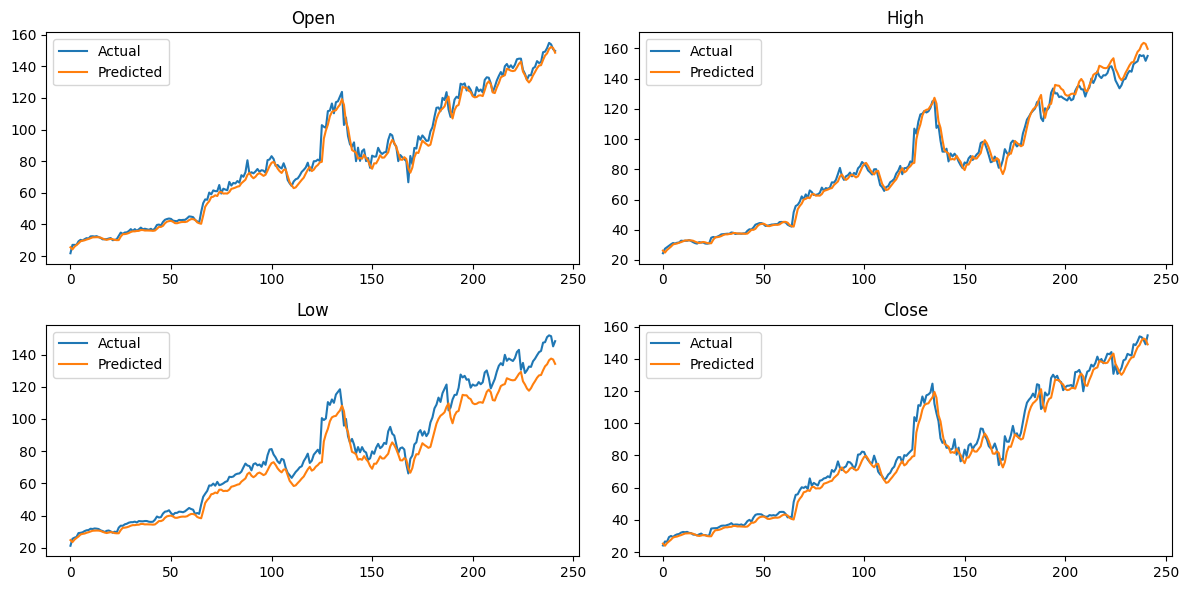

In [257]:
import matplotlib.pyplot as plt

# Predict on test set
Y_pred_scaled = model.predict(X_test)
Y_pred = y_scaler.inverse_transform(Y_pred_scaled)
Y_true = y_scaler.inverse_transform(Y_test)

# Plot Open/High/Low/Close for a few samples
plt.figure(figsize=(12, 6))
for i, label in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i+1)
    plt.plot(Y_true[:, i], label='Actual')
    plt.plot(Y_pred[:, i], label='Predicted')
    plt.title(label)
    plt.legend()
plt.tight_layout()
plt.show()


In [258]:
# Get last input row
latest_input = DL_DF.iloc[-1][[f'Target-{f}-{i+1}' for i in reversed(range(2)) for f in features]]
latest_input = latest_input.values.reshape(1, 2, 4)
latest_input_scaled = x_scaler.transform(latest_input.reshape(-1, 4)).reshape(1, 2, 4)

# Predict
pred_scaled = model.predict(latest_input_scaled)
pred_next = y_scaler.inverse_transform(pred_scaled)

# Display nicely
print("Predicted next day prices:")
print({f: round(v, 2) for f, v in zip(features, pred_next[0])})


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted next day prices:
{'Open': np.float32(148.62), 'High': np.float32(159.72), 'Low': np.float32(134.19), 'Close': np.float32(149.04)}


In [260]:
model.save("stock_lstm_model.keras")
